In [1]:
import numpy as np
import pandas as pd
import os, sys
import cv2
import matplotlib.pyplot as plt
import sys
from PIL import Image, ImageOps
from pathlib import Path

loading data
Root dir is /Users/vviswanathan/berkeley
X_data shape: (10, 30, 30)
X_data shape: (30, 30)


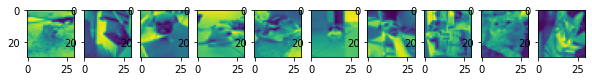

In [2]:
# read training file

def loadTrainData():
    print('loading data')
    print('Root dir is', os.getcwd())
    trainDir='petfinder-pawpularity-score/'
    trainImgPath = Path('petfinder-pawpularity-score/train/')
    trainMdata=pd.read_csv('petfinder-pawpularity-score/train.csv', engine = 'python')
    trainMdata['path'] = trainMdata['Id'].apply(lambda x: trainImgPath/(x + '.jpg'))

    imgArr=[]
    for ind in trainMdata.index:
        if ((ind+1)%11 == 0):
            break
        imRgb = Image.open(trainMdata['path'][ind])
        #.convert("RGB")
        imRgb = imRgb.resize((30, 30))
        imGs= ImageOps.grayscale(imRgb)
        im = np.array(imGs)
        imgArr.append(im)

    X_train=np.array(imgArr, dtype=float)
    X_train = X_train / 255.0
    return X_train, trainMdata

def printImages(sampleSize=10):
    plt.figure(figsize =(10, 1))
    for i in range(sampleSize):
        plt.subplot(1, 10, i+1)
        plt.imshow(X_train[i])

X_train, dfMetadata = loadTrainData()
print('X_data shape:', X_train.shape)
print('X_data shape:', X_train[0].shape)
printImages(sampleSize=10)